# Part 1: Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
# load json file as dataframe
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# profile report for descriptive statistics
ProfileReport(logins_df)

In [4]:
# set datetime as index
logins_df = logins_df.set_index(['login_time'])
logins_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [5]:
# aggregate on 15 minute intervals
logins_df['count'] = 1
logins_df_15 = logins_df.resample('15T').count()
logins_df_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
logins_df_15 = logins_df_15.reset_index()

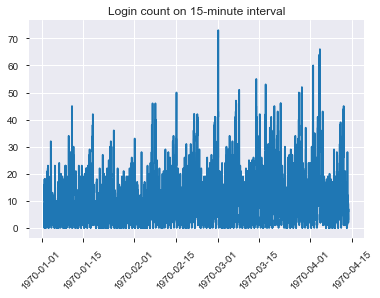

In [7]:
plt.plot(logins_df_15['login_time'], logins_df_15['count'])
plt.title('Login count on 15-minute interval')
plt.xticks(rotation=45)
plt.show()

There appears to be some seasonality to the data so we can look at weekly, daily, and hourly data to see if we can spot any trends.

In [8]:
month_1 = logins_df_15[(logins_df_15['login_time'] > '1970-01') & 
                     (logins_df_15['login_time'] < '1970-02')]
month_1.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


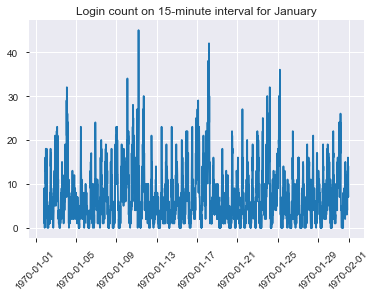

In [9]:
plt.plot(month_1['login_time'], month_1['count'])
plt.title('Login count on 15-minute interval for January')
plt.xticks(rotation=45)
plt.show()

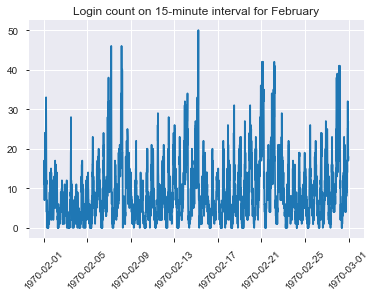

In [10]:
month_2 = logins_df_15[(logins_df_15['login_time'] > '1970-02') & 
                     (logins_df_15['login_time'] < '1970-03')]
plt.plot(month_2['login_time'], month_2['count'])
plt.title('Login count on 15-minute interval for February')
plt.xticks(rotation=45)
plt.show()

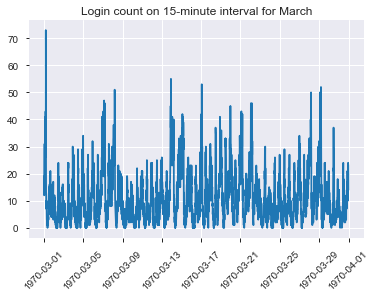

In [11]:
month_3 = logins_df_15[(logins_df_15['login_time'] > '1970-03') & 
                     (logins_df_15['login_time'] < '1970-04')]
plt.plot(month_3['login_time'], month_3['count'])
plt.title('Login count on 15-minute interval for March')
plt.xticks(rotation=45)
plt.show()

There seems to be predominant weekly spikes in the number of user logins, so we can increase our resolution to daily.

In [12]:
# agregate on weekday
logins_df_15['day'] = logins_df_15['login_time'].dt.dayofweek
logins_df_day = logins_df_15.groupby('day').sum().reset_index()
days = ['M', 'T', 'W', 'Th', 'F', 'Sat', 'Sun']
logins_df_day['day'] = days
logins_df_day

,day,count
0,M,8823
1,T,9268
2,W,10339
3,Th,11960
4,F,15208
5,Sat,19377
6,Sun,18167


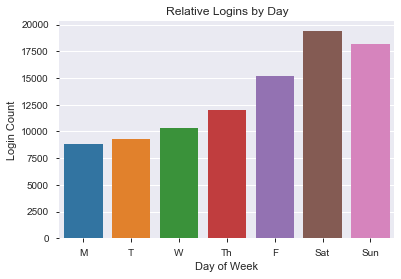

In [13]:
sns.barplot(x='day', y='count', data=logins_df_day)
plt.title('Relative Logins by Day')
plt.xlabel('Day of Week')
plt.ylabel('Login Count')
plt.show()

In [14]:
logins_df_15['hour'] = logins_df_15['login_time'].dt.hour
logins_df_hour = logins_df_15.groupby('hour').sum().reset_index()
logins_df_hour = logins_df_hour[['hour', 'count']]
logins_df_hour

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


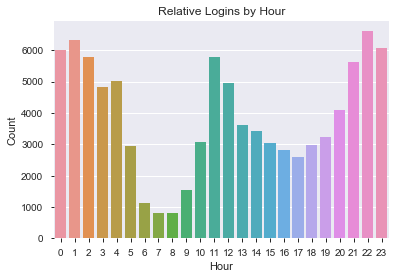

In [15]:
sns.barplot(x='hour', y='count', data=logins_df_hour)
plt.title('Relative Logins by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Analysis
The weekly seasonality can comes from the increase in login count over the weekend and there seems to be a finer seasonality at the daily level where logins peak every 12 hours around midnight and noon. Further exploration could be done to look at the hourly logins for each aggregated day and see if the weekend login times have a different distribution from weekday times. For example, maybe most of the late night login times can be attributed to weekend days.

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Response
1. Seeing as the goal of any company is to make a profit, the most obvious metric for deteremining the efficacy of this plan could be the profit after the reimbursement for the tolls. However, an import consideration here is that there is a difference in activity on the weekends so we want to consider the resolution of our metric. It may be that the profit after reimbursement during weekdays is lower with this strategy while the profit after reimbursement during the weekend is higher since the demand for rides is more evenly spread across both cities. 
2. A practical experiment to test the strategy of reimbursing all toll costs regardless of the day could be a simple A/B test where a subset of the drivers are offered the reimbursement for several months and the profit after reimbursement would be compared to the regular drivers. The data would then be assessed using a t-test with a standard p-value of 0.05. If we want to take into account the variation in activity we could perform 2 separate A/B tests where some drivers are offered the reimbursement on weekdays and some on weekends. If the profits increase then the strategy should be implemented, if the profits remain the same the strategy could still be implemented if feedback from drivers is positive, and if profits decrease then possibilities like exploitation of the reimbursement could be investigated to rule out other factors

# Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

## Data Description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [35]:
# load data
import json
file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [36]:
# descriptive statistics
ProfileReport(df)

*avg_rating_by_driver* and *avg_rating_of_driver* can be imputed with average values and *phone* NaN values an just be assigned to the majority class, *last_trip_date* and *signup_date* can be converted to datetime objects, and the zero values can be accounted for

In [37]:
# deal with missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [38]:
# clean up datatypes
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [39]:
# determine retention rate
df['retained'] = (df['last_trip_date'] >= '2014-06-01')
df['retained'].sum() / len(df)

0.37608

We can look at the imbalanced categorical classes to see if they provide information on relative retention rates since the other features show fairly weak correlation in the ProfileReport. We can also look at *trips_in_first_30_days* and *ultimate_black_user* since they seem to be good indicators of retention.

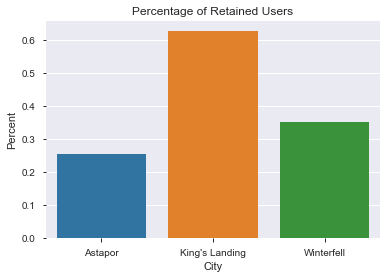

In [40]:
y = df.groupby('city').sum()['retained'] / df['city'].value_counts()
sns.barplot(y.index, y)
plt.title('Percentage of Retained Users')
plt.xlabel('City')
plt.ylabel('Percent')
plt.show()

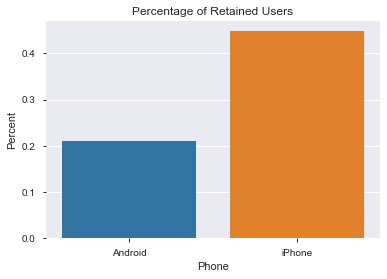

phone
Android     3146.0
iPhone     15658.0
Name: retained, dtype: float64

In [41]:
y = df.groupby('phone').sum()['retained'] / df['phone'].value_counts()
sns.barplot(y.index, y)
plt.title('Percentage of Retained Users')
plt.xlabel('Phone')
plt.ylabel('Percent')
plt.show()
df.groupby('phone').sum()['retained']

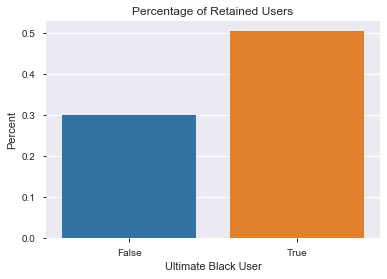

phone
Android     3146.0
iPhone     15658.0
Name: retained, dtype: float64

In [42]:
y = df.groupby('ultimate_black_user').sum()['retained'] / df['ultimate_black_user'].value_counts()
sns.barplot(y.index, y)
plt.title('Percentage of Retained Users')
plt.xlabel('Ultimate Black User')
plt.ylabel('Percent')
plt.show()
df.groupby('phone').sum()['retained']

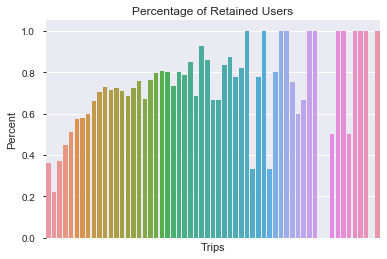

phone
Android     3146.0
iPhone     15658.0
Name: retained, dtype: float64

In [43]:
y = df.groupby('trips_in_first_30_days').sum()['retained'] / df['trips_in_first_30_days'].value_counts()
sns.barplot(y.index, y)
plt.title('Percentage of Retained Users')
plt.xlabel('Trips')
plt.xticks([],[])
plt.ylabel('Percent')
plt.show()
df.groupby('phone').sum()['retained']

We can verify through the correlations that t

### Data Preparation

In [25]:
# save target
y = df['retained'].astype('int')
df.drop('retained', axis=1, inplace=True)
# drop unnecessary datetime features and retype boolean
df['ultimate_black_user'] = df['ultimate_black_user'].astype('int')
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)

In [26]:
# one-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_0,ultimate_black_user_1
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


In [45]:
pd.concat([df_encoded, df['retained']],
          axis=1).corr().iloc[14].sort_values(
    ascending=False)

retained                  1.000000
city_King's Landing       0.262284
phone_iPhone              0.225464
trips_in_first_30_days    0.210463
ultimate_black_user_1     0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
city_Winterfell          -0.046611
avg_dist                 -0.092780
city_Astapor             -0.174655
ultimate_black_user_0    -0.205002
phone_Android            -0.225464
Name: retained, dtype: float64

We can again see here that there is high correlation with *city*, *phone*, *trips_in_first_30_days*, and *ultimate_black_user*.

In [27]:
# conver to numpy array for model
X = df_encoded.values

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow

Using TensorFlow backend.


In [30]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [31]:
batch_size = [50, 100, 1000]
epochs = [5, 10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)

model = KerasClassifier(build_fn=create_model)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





40000/40000 [==============================] - 2s 46us/step - loss: 0.5750 - acc: 0.7031
Epoch 2/20
40000/40000 [==============================] - 1s 28us/step - loss: 0.5215 - acc: 0.7450
Epoch 3/20
40000/40000 [==============================] - 1s 29us/step - loss: 0.5067 - acc: 0.7577
Epoch 4/20
40000/40000 [==============================] - 1s 27us/step - loss: 0.4987 - acc: 0.7645
Epoch 5/20
40000/40000 [==============================] - 1s 26us/step - loss: 0.4944 - acc: 0.7657
Epoch 6/20
40000/40000 [==============================] - 1s 26us/step - loss: 0.4918 - acc: 0.7687
Epoch 7/20
40000/40000 [==============================] - 1s 25us/step - loss: 0.4897 - acc: 0.7700
Epoch 8/20
40000/40000 [==============================] - 1s 26us/step - loss: 0.4879 - acc: 0.7717
Epoch 9/20
40000/40000 [==============================] - 1s 26us/step - loss: 0.4865 - acc: 

### Conclusion

Our simple model gets about $77.3\%$ accuracy which is much better than choosing the majority class. Alternative approaches would be to use an ensemble model such as a Random Forest or XGBoost as they are known to perform well. Ultimate could use these results, by focusing on the insight that the phone, city, ultimate black membership, and number of trips in the first 30 days are important indicators of retention. Marketing strategies can be done to target the high certain cities or phone users and since ultimate black membership is a fairly good indicator of retention, perhaps offering a discounted membership to inactive users will help increase retention rates, although it is more likely the case that people who already intend to be active members will get ultimate black and insentivizing ultimate black will have no effect on future activity.